In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data = pd.read_clipboard()

In [5]:
data[:3]

,請問你是如何得知,加入群組期待可以收穫什麼,請問你的背景為何,對於目前群組討論還滿意嗎,有任何對於群組的建議嗎
0,朋友分享給我的連結,拓展人脈,學生,2,NaN
1,看到 WeiChun (Marcus 張為淳) Chang 在LinkedIn的貼文,交流意見,資料科學家 - 機器學習,3,無
2,看到 WeiChun (Marcus 張為淳) Chang 在LinkedIn的貼文,單純聽聽,業務、商業開發,4,NaN


In [8]:
data['請問你是如何得知'].value_counts()

看到 WeiChun (Marcus 張為淳) Chang 在LinkedIn的貼文    125
朋友分享給我的連結                                       7
在政大時就有在看您的文章，在社團看到連結，進來學習                       1
Name: 請問你是如何得知, dtype: int64

In [11]:
how = {'看到 WeiChun (Marcus 張為淳) Chang 在LinkedIn的貼文':'LinkedIn'
       ,'朋友分享給我的連結':'Friend','在政大時就有在看您的文章，在社團看到連結，進來學習':'Friend'}

data['請問你是如何得知'] = data['請問你是如何得知'].map(how)

([<matplotlib.patches.Wedge at 0x7f8315a53af0>,
 [Text(-1.080418474473741, 0.20662991074826143, 'LinkedIn'),
  Text(1.0804184696372185, -0.20662993603728122, 'Friend')],
 [Text(-0.5893191678947678, 0.11270722404450621, '94%'),
  Text(0.5893191652566646, -0.11270723783851702, '6%')])

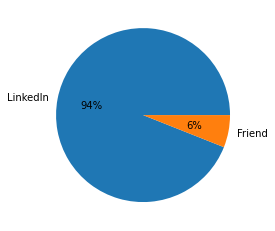

In [14]:
labels = ['LinkedIn','Friend']
plt.pie(data['請問你是如何得知'].value_counts(), labels=labels, autopct='%1.0f%%')


In [16]:
data['請問你的背景為何'].value_counts().to_clipboard()

In [17]:
data[data['加入群組期待可以收穫什麼'].str.contains('拓展人脈')].shape

(89, 5)

In [18]:
data[data['加入群組期待可以收穫什麼'].str.contains('交流意見')].shape

(55, 5)

In [19]:
data[data['加入群組期待可以收穫什麼'].str.contains('單純聽聽')].shape

(32, 5)

In [22]:
79+45+32

156

In [23]:
import jieba

In [25]:
seg_list = jieba.cut("我來到北京清華大學", cut_all=True)
print("/ ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/wf/rr_jydhn0r31g2bhq_jwpc480000gs/T/jieba.cache
Loading model cost 0.668 seconds.
Prefix dict has been built successfully.


我/ 來/ 到/ 北京/ 清/ 華/ 大/ 學


In [34]:
data.shape

(133, 5)

In [29]:
data[~data['有任何對於群組的建議嗎'].isnull()]['加入群組期待可以收穫什麼'].value_counts()

拓展人脈                                   15
拓展人脈、交流意見                               7
交流意見                                    7
交流意見、拓展人脈、單純聽聽                          5
對職涯有困惑，想看看其他人的想法，正在考慮轉職創投，想認識這個領域的人     1
拓展人脈、單純聽聽                               1
單純聽聽                                    1
Name: 加入群組期待可以收穫什麼, dtype: int64

In [35]:
data['對於目前群組討論還滿意嗎'].value_counts()/133

4    0.473684
3    0.278195
5    0.218045
2    0.022556
1    0.007519
Name: 對於目前群組討論還滿意嗎, dtype: float64

In [96]:
data[(~data['有任何對於群組的建議嗎'].str.contains('無',na=False))&
    (~data['有任何對於群組的建議嗎'].str.contains('沒有',na=False))&
    (~data['有任何對於群組的建議嗎'].isnull())]['對於目前群組討論還滿意嗎'].value_counts()/29

4    0.517241
5    0.275862
3    0.172414
2    0.034483
Name: 對於目前群組討論還滿意嗎, dtype: float64

In [97]:
data[(~data['有任何對於群組的建議嗎'].str.contains('無',na=False))&
    (~data['有任何對於群組的建議嗎'].str.contains('沒有',na=False))&
    (~data['有任何對於群組的建議嗎'].isnull())]['請問你的背景為何'].value_counts()

分析相關崗位        6
軟體工程師         5
人資、獵人頭        3
專案經理          3
學生            3
數據科學家 - 分析    2
採購、供應鏈相關      2
投資相關          2
業務、商業開發       2
財務、會計相關       1
Name: 請問你的背景為何, dtype: int64

In [40]:
data[~data['有任何對於群組的建議嗎'].isnull()]['有任何對於群組的建議嗎'].tolist()

['無',
 '可以吸收多一點人資相關經驗',
 '期待有機會線上或線下的聚會',
 '目前大家的討論的內容很多樣，會有點難follow up\n或許是分主題（自我介紹，職場分享，DS分享 etc.）會比較好看到\n不過不知道telegram有沒有這樣的功能 集結同個主題的在一起\n有點類似於fb 不過又會比fb更容易交流 ',
 '不清楚耶，目前好像有點散亂🤣但我也暫時想不到解決方法',
 '希望可以有更透明的個人信息知道大家的工作背景，有一些線上線下的networking event（有主題性的e.g. 科技業、金融業 etc）',
 '目前無',
 '是否能根據不同職位分成小的交流群，大的交流群訊息新增很快，內容也比較雜',
 '希望可以針對不同主題開設小聊天室，也期待有線下活動，謝謝群主',
 '可定期提出討論的主題，方便集中資訊',
 '延續一些議題的討論。有些議題被洗掉很可惜。可以用外部類似帖子的方式做一些統整紀錄',
 '很期待未來的發展，板大加油',
 '目前群組好在成員多樣性，彼此自介後，如何維持熱度，或頻率相近的人有更多交流，共好利它。',
 '希望有個依照產業 職業分類的表單，可以很快找到需要的人脈，大家互相幫忙成長',
 '覺得無法搜尋討論過的議題有點問題，但是這個問題也不應該由群主處理，因為你創立這個群組，讓大家可以互相交流已經非常棒了，感謝你',
 '感謝創群，人才資源很多！如果可以分主題小群更好，資訊更分流清楚，非常感謝！',
 '現在的討論發散，建議讓大家以分組的形式進行交流，是否可以從大家有興趣的題目開始',
 '謝謝創群噢，很多元很有趣',
 '目前還沒有！覺得這個群組很屌，各方人馬都在裡面。自己最近很積極在尋找出國工作的機會，希望能在裡頭找到契機。\n謝謝學長建立這個群組🙏🙏',
 '可以有分類的討論資訊',
 '或許可以在LinkedIn 或其他可以方便分類討論的社群再開設一個群組方便交流 😊',
 '對於碩班的學生來說，能透過群組認識到各位業界的前輩真的是一個很特別的管道！感謝您',
 '期待能進行panel discussion ',
 '目前沒有',
 '如何能更有效分群討論，不然很容易被洗掉討論串～',
 '初來乍到，未來若有想法一定馬上提出！',
 '暫時先自由發揮吧',
 '謝謝有這個機會可以加入群組',
 '謝謝

In [41]:
text_list = ' '.join(data[~data['有任何對於群組的建議嗎'].isnull()]['有任何對於群組的建議嗎'].tolist())

In [89]:
#seg_list = jieba.cut(text_list, cut_all=True)
#seg_list = jieba.cut(text_list, cut_all=True)
seg_list = jieba.cut_for_search(text_list)

In [83]:
print("/ ".join(seg_list))

無/  / 可以/ 吸收/ 多一點/ 人資/ 相關/ 經驗/  / 期待/ 有/ 機會線/ 上/ 或線/ 下/ 的/ 聚會/  / 目前/ 大家/ 的/ 討論/ 的/ 內容/ 很多/ 樣/ ，/ 會/ 有點/ 難/ follow/  / up/ 
/ 或許/ 是/ 分主題/ （/ 自我/ 介紹/ ，/ 職場/ 分享/ ，/ DS/ 分享/  / etc/ ./ ）/ 會/ 比/ 較/ 好/ 看到/ 
/ 不過/ 不/ 知道/ telegram/ 有/ 沒/ 有/ 這樣/ 的/ 功能/  / 集結/ 同個/ 主題/ 的/ 在/ 一起/ 
/ 有點/ 類似/ 於/ fb/  / 不過/ 又/ 會/ 比/ fb/ 更/ 容易/ 交流/  /  / 不/ 清楚/ 耶/ ，/ 目前/ 好像/ 有點/ 散亂/ 🤣/ 但/ 我/ 也/ 暫時/ 不到/ 想不到/ 解決/ 方法/  / 希望/ 可以/ 有/ 更/ 透明/ 的/ 個/ 人/ 信息/ 知道/ 大家/ 的/ 工作/ 背景/ ，/ 有/ 一些/ 線/ 上線/ 下/ 的/ networking/  / event/ （/ 有主題/ 性/ 的/ e/ ./ g/ ./  / 科技/ 業/ 、/ 金融/ 業/  / etc/ ）/  / 目前/ 無/  / 是否/ 能/ 根據/ 不同/ 職位/ 分成/ 小/ 的/ 交流/ 群/ ，/ 大/ 的/ 交流/ 群訊息/ 新增/ 很快/ ，/ 內容/ 也/ 比/ 較雜/  / 希望/ 可以/ 針對/ 不同/ 主題/ 開設/ 小/ 聊天/ 聊天室/ ，/ 也/ 期待/ 有線/ 下/ 活動/ ，/ 謝謝/ 群主/  / 可/ 定期/ 提出/ 討論/ 的/ 主題/ ，/ 方便/ 集中/ 資訊/  / 延續/ 一些/ 議題/ 的/ 討論/ 。/ 有些/ 議題/ 被/ 洗掉/ 很/ 可惜/ 。/ 可以/ 用/ 外部/ 類似/ 帖子/ 的/ 方式/ 做/ 一些/ 統整/ 紀錄/  / 很/ 期待/ 未來/ 的/ 發展/ ，/ 板大/ 加油/  / 目前/ 群組/ 好/ 在/ 成員多樣/ 性/ ，/ 彼此/ 自介/ 後/ ，/ 如何/ 維持/ 熱度/ ，/ 或/ 頻率/ 相近/ 的/ 人/ 有/ 更/ 多/ 交流/ ，/ 共好利/ 它/ 。/  / 希望/ 有個/ 依照/ 產業/  / 職業/ 分類/ 

In [43]:
from collections import Counter

In [90]:
counts = Counter(seg_list)

In [91]:
counts.most_common(20)

[(' ', 57),
 ('，', 34),
 ('的', 30),
 ('可以', 12),
 ('有', 11),
 ('討論', 11),
 ('群組', 8),
 ('大家', 7),
 ('在', 7),
 ('交流', 7),
 ('。', 7),
 ('很', 7),
 ('目前', 6),
 ('主題', 5),
 ('更', 5),
 ('能', 5),
 ('謝謝', 5),
 ('或', 5),
 ('這個', 5),
 ('！', 5)]

In [98]:
data[(~data['有任何對於群組的建議嗎'].str.contains('可以',na=False))&(~data['有任何對於群組的建議嗎'].isnull())
    &(~data['有任何對於群組的建議嗎'].str.contains('無',na=False))
    &(~data['有任何對於群組的建議嗎'].str.contains('沒有',na=False))]

,請問你是如何得知,加入群組期待可以收穫什麼,請問你的背景為何,對於目前群組討論還滿意嗎,有任何對於群組的建議嗎
14,LinkedIn,拓展人脈,分析相關崗位,4,期待有機會線上或線下的聚會
22,LinkedIn,拓展人脈,分析相關崗位,3,不清楚耶，目前好像有點散亂🤣但我也暫時想不到解決方法
37,LinkedIn,拓展人脈,軟體工程師,5,是否能根據不同職位分成小的交流群，大的交流群訊息新增很快，內容也比較雜
44,LinkedIn,交流意見,專案經理,5,可定期提出討論的主題，方便集中資訊
52,LinkedIn,交流意見,採購、供應鏈相關,5,很期待未來的發展，板大加油
56,LinkedIn,拓展人脈,軟體工程師,4,目前群組好在成員多樣性，彼此自介後，如何維持熱度，或頻率相近的人有更多交流，共好利它。
75,LinkedIn,單純聽聽,分析相關崗位,4,謝謝創群噢，很多元很有趣
81,LinkedIn,拓展人脈,學生,5,對於碩班的學生來說，能透過群組認識到各位業界的前輩真的是一個很特別的管道！感謝您
92,LinkedIn,拓展人脈,業務、商業開發,4,期待能進行panel discussion
98,LinkedIn,交流意見、拓展人脈、單純聽聽,人資、獵人頭,4,如何能更有效分群討論，不然很容易被洗掉討論串～
